In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N * K, D))
    y = np.zeros(N *K, dtype='uint8')
    
    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)
        t = np.linspace(j*4, (j + 1)*4, N) + np.random.randn(N) * 0.2
        X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
        y[ix] = j
    return X, y 

In [5]:
X, y = devil(300)

In [6]:
X[:, 0] += np.random.normal(loc=0, scale=0.15, size=300)
X[:, 1] += np.random.normal(loc=0, scale=0.15, size=300)

In [8]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

x_min, x_max = (-1, 1)
y_min, y_max = (-1, 1)

h = 0.05

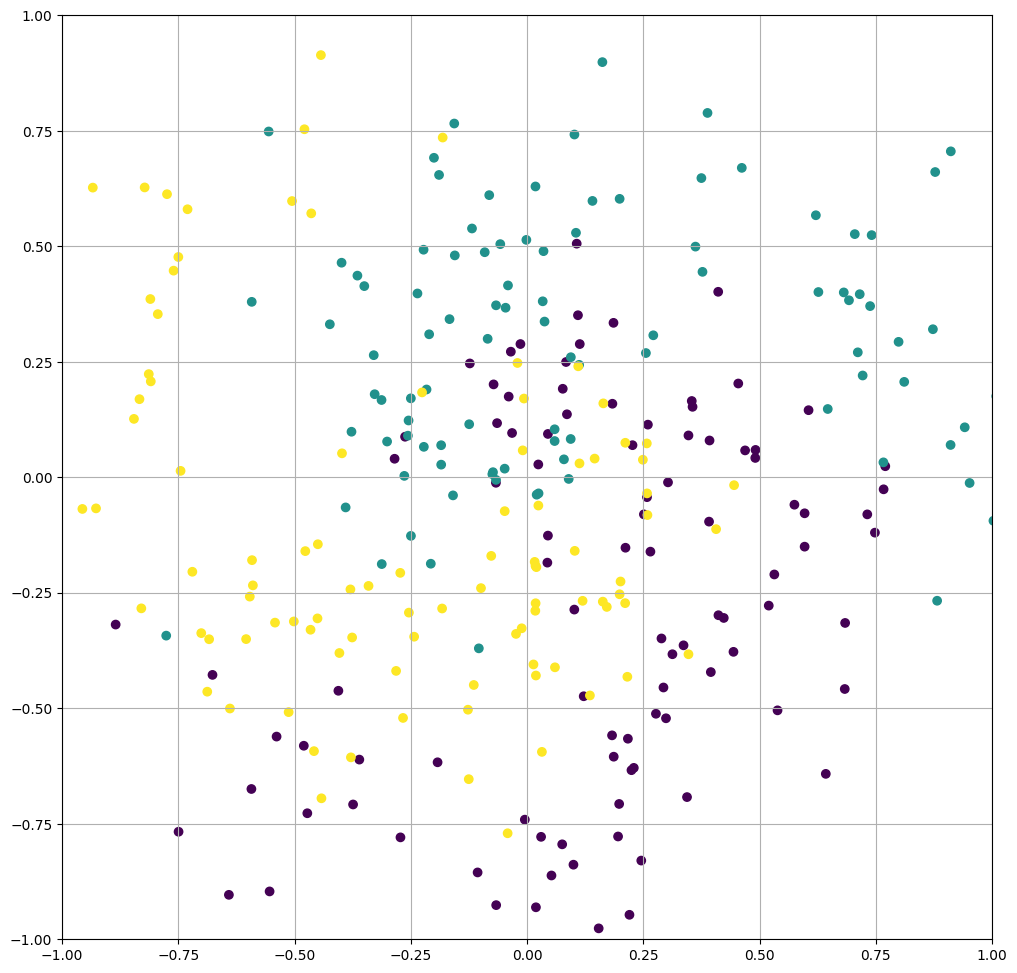

In [9]:
plt.figure(figsize=(12,12))
plt.scatter(X[:, 0], X[: ,1], c=y)

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [12]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(f'Train:  {accuracy_score(y_train, y_train_pred)}')
print(f'Test:  {accuracy_score(y_test, y_test_pred)}')

Train:  0.8222222222222222
Test:  0.7


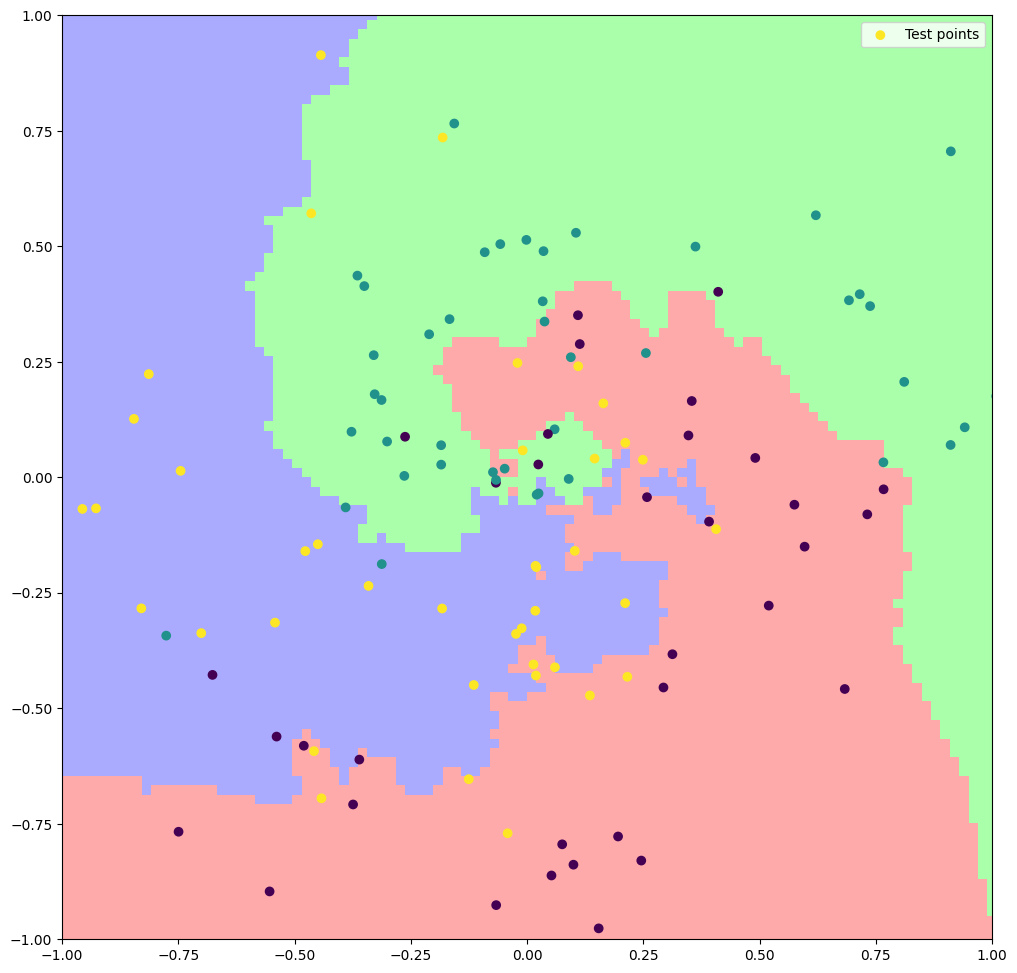

In [17]:
plt.figure(figsize=(12,12))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

xx, yy= np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(x_min, x_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label = 'Test points')

plt.legend()
plt.show()